In [223]:
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
df_performance = pd.read_csv('UCL_AllTime_Performance_Table.csv')
df_finals = pd.read_csv('UCL_Finals_1955-2023.csv')

display(df_performance.head())
display(df_finals.head())

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern Munich,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


In [227]:
# Step 1: Add Goals Scored and Goals Conceded to df_performance
# Load the performance data
df_performance['Goals Scored'] = df_performance['goals'].str.split(':').str[0].astype(int)
df_performance['Goals Conceded'] = df_performance['Goals Scored'] - df_performance['Dif'].astype(int)

# Step 2: Wins for each team
winners_count = df_finals['Winners'].value_counts().reset_index()
winners_count.columns = ['Team', 'Finals Wins']

# Step 3: Number of losses for each team (Runners-up)
runnersup_count = df_finals['Runners-up'].value_counts().reset_index()
runnersup_count.columns = ['Team', 'Finals Losses']

# Step 4: Winners and runners-up counts
finals_summary = winners_count.merge(runnersup_count, on='Team', how='outer').fillna(0)

# Step 5: Merge with all-time performance CSV
merged_data = finals_summary.merge(df_performance, on='Team', how='left')

# Convert counts to integers for consistency
merged_data['Finals Wins'] = merged_data['Finals Wins'].astype(int)
merged_data['Finals Losses'] = merged_data['Finals Losses'].astype(int)

# Display the merged data with Goals Scored and Goals Conceded
display(merged_data[['Team', 'Goals Scored', 'Goals Conceded', 'Finals Wins', 'Finals Losses']].head())

,Team,Goals Scored,Goals Conceded,Finals Wins,Finals Losses
0,AC Milan,431.0,260.0,7,4
1,AFC Ajax,347.0,242.0,4,2
2,Arsenal FC,324.0,226.0,0,1
3,Aston Villa,24.0,10.0,1,0
4,Atlético Madrid,242.0,164.0,0,4


In [229]:
# Step 1: Calculate total finals appearances
merged_data['Finals Appearances'] = merged_data['Finals Wins'] + merged_data['Finals Losses']

# Step 2: Calculate win percentage in finals
merged_data['Win % Finals'] = (merged_data['Finals Wins'] / merged_data['Finals Appearances']) * 100

# Step 3: Calculate win percentage of all matches excluding finals
# Total matches excluding finals = Total matches - Finals appearances
merged_data['Matches Excluding Finals'] = merged_data['M.'] - merged_data['Finals Appearances']

# Win percentage excluding finals = (Total Wins - Finals Wins) / Matches Excluding Finals
merged_data['Win % Excl. Finals'] = ((merged_data['W'] - merged_data['Finals Wins']) / merged_data['Matches Excluding Finals']) * 100

# Step 4: Calculate overall win percentage (all matches including finals)
merged_data['Overall Win %'] = (merged_data['W'] / merged_data['M.']) * 100

# Step 5: Integrate Goals Scored and Goals Conceded
# Drop rows where 'goals' is missing
# Alternatively, you can fill NaN values with 0 if appropriate
merged_data['goals'] = merged_data['goals'].fillna('0:0')  # Fill NaN with a default value
merged_data['Dif'] = merged_data['Dif'].fillna(0)  # Fill NaN with 0 for goal difference

# Goals Scored: Extract from the 'goals' column (before the first ':')
merged_data['Goals Scored'] = merged_data['goals'].str.split(':').str[0].astype(int)

# Goals Conceded: Calculate as Goals Scored - Goal Difference (Dif)
merged_data['Goals Conceded'] = merged_data['Goals Scored'] - merged_data['Dif'].astype(int)

# Preview the updated merged data
display(merged_data[['Team', 'Goals Scored', 'Goals Conceded', 'Win % Finals', 'Win % Excl. Finals', 'Overall Win %']].head())

,Team,Goals Scored,Goals Conceded,Win % Finals,Win % Excl. Finals,Overall Win %
0,AC Milan,431,260,63.636364,47.244094,47.924528
1,AFC Ajax,347,242,66.666667,45.933014,46.511628
2,Arsenal FC,324,226,0.000000,47.448980,47.208122
3,Aston Villa,24,10,100.000000,57.142857,60.000000
4,Atlético Madrid,242,164,0.000000,48.765432,47.590361


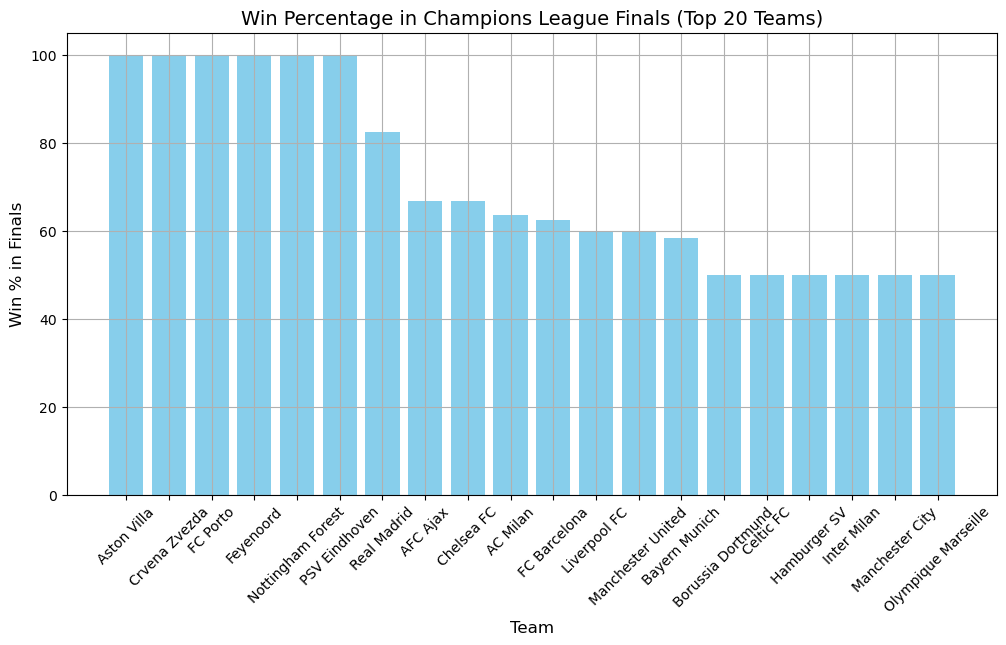

In [237]:
# Select the top 20 teams by Win % Finals
top_20 = merged_data.nlargest(20, 'Win % Finals')

# Bar plot for Win % Finals (Top 20 Teams)
plt.figure(figsize=(12, 6))
plt.bar(top_20['Team'], top_20['Win % Finals'], color='skyblue')
plt.title('Win Percentage in Champions League Finals (Top 20 Teams)', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Win % in Finals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

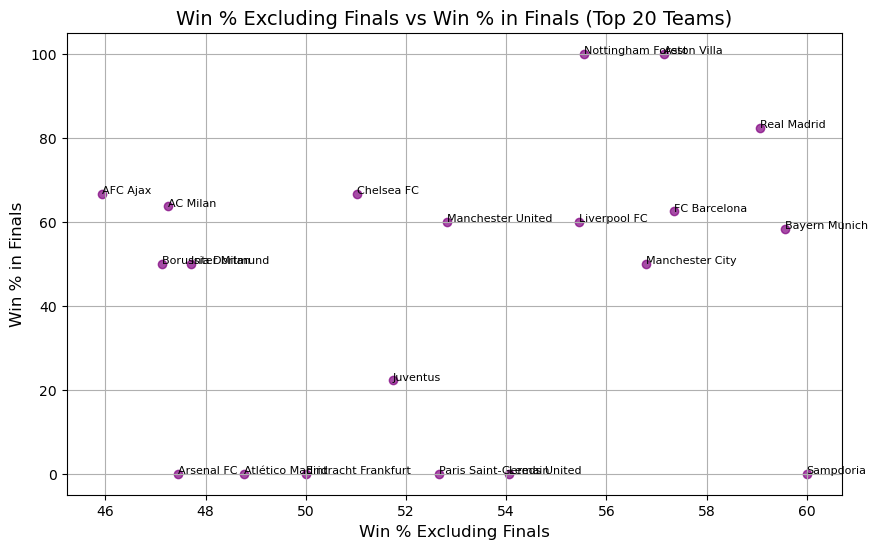

In [233]:
# Select the top 20 teams by Overall Win % (or any other metric you prefer)
top_20 = merged_data.nlargest(20, 'Overall Win %')

# Scatter plot: Win % Excl. Finals vs Win % Finals (Top 20 Teams)
plt.figure(figsize=(10, 6))
plt.scatter(top_20['Win % Excl. Finals'], top_20['Win % Finals'], color='purple', alpha=0.7)
plt.title('Win % Excluding Finals vs Win % in Finals (Top 20 Teams)', fontsize=14)
plt.xlabel('Win % Excluding Finals', fontsize=12)
plt.ylabel('Win % in Finals', fontsize=12)
plt.grid(True)

# Annotate top teams to enhance readability
for i, team in enumerate(top_20['Team']):
    plt.annotate(team, (top_20['Win % Excl. Finals'].iloc[i], 
                        top_20['Win % Finals'].iloc[i]), fontsize=8)

plt.show()